In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


cars_dir = ('cars.csv')
brand_dir = ('brand.csv')
cars_df = pd.read_csv(cars_dir)
brand_df = pd.read_csv(brand_dir)

print(car_df.head())

            title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA   6900           70189               2016              3.0   
1  VAUXHALL CORSA   1495           88585               2008              4.0   
2     HYUNDAI I30    949          137000               2011              NaN   
3      MINI HATCH   2395           96731               2010              5.0   
4  VAUXHALL CORSA   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history  
0             NaN  
1            Full  
2             NaN  
3            Full 

In [23]:
print(brand_df.head())

      title         country
0     skoda  Czech Republic
1  vauxhall  United Kingdom
2   hyundai     South Korea
3      mini  United Kingdom
4      ford   United States


In [ ]:
# 1) title에서 브랜드 이름 뽑기 (맨 앞 단어)
cars_df["brand_name"] = (
    cars_df["title"]
    .astype(str)
    .str.strip()
    .str.split(" ") 
    .str[0]
    .str.lower()
)

cars_df[["title", "brand_name"]].head(10)

,title,brand_name
0,SKODA FABIA,skoda
1,VAUXHALL CORSA,vauxhall
2,HYUNDAI I30,hyundai
3,MINI HATCH,mini
4,VAUXHALL CORSA,vauxhall
5,HYUNDAI COUPE,hyundai
6,FORD FOCUS,ford
7,VAUXHALL CORSA,vauxhall
8,VOLVO 740,volvo
9,PEUGEOT 207,peugeot


In [61]:
brand_df.columns

Index(['title', 'country'], dtype='object')

In [71]:
brand_col = "title"

brand_df[brand_col] = brand_df[brand_col].astype(str).str.strip().str.lower()
brand_df = brand_df.drop_duplicates(subset=[brand_col])

brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [73]:
print(brand_df.columns)

Index(['title', 'country'], dtype='object')


In [ ]:
cars_tmp = cars_df.rename(columns={"title": "car_title"}).copy()

df = cars_tmp.merge(
    brand_df,
    how="left",
    left_on="brand_name",
    right_on="title"
)

print("merge 후 df shape:", df.shape)
print("매칭 실패 개수:", df["title"].isna().sum())

# 매칭 안 된 것들 확인
df[df["title"].isna()][["car_title", "brand_name"]].head(10)


merge 후 df shape: (3687, 16)
매칭 실패 개수: 0


,car_title,brand_name


In [75]:
df.isna().sum().sort_values(ascending=False).head(20)

Service history      3147
Previous Owners      1411
Emission Class         87
Engine                 45
Seats                  35
Doors                  25
car_title               0
Price                   0
Mileage(miles)          0
Registration_Year       0
Fuel type               0
Body type               0
Gearbox                 0
brand_name              0
title                   0
country                 0
dtype: int64

In [76]:
if "Service history" in df.columns:
    df["Service history"] = df["Service history"].fillna("Unknown")

df["na_count"] = df.isna().sum(axis=1)

threshold = 3 
before = df.shape[0]
df = df[df["na_count"] < threshold].copy()
after = df.shape[0]

print("제거 전:", before, "제거 후:", after, "제거된 행:", before-after)

df.drop(columns=["na_count"], inplace=True)
df.isna().sum().sort_values(ascending=False).head(20)

제거 전: 3687 제거 후: 3626 제거된 행: 61


Previous Owners      1361
Emission Class         26
Seats                  11
Doors                   7
Engine                  1
car_title               0
Price                   0
Mileage(miles)          0
Registration_Year       0
Fuel type               0
Body type               0
Gearbox                 0
Service history         0
brand_name              0
title                   0
country                 0
dtype: int64

In [80]:
def extract_number(x):
    if pd.isna(x):
        return np.nan
    s = str(x)
    m = re.search(r"(\d+(\.\d+)?)", s.replace(",", ""))
    return float(m.group(1)) if m else np.nan

for col in ["Engine", "Emission Class"]:
    if col in df.columns:
        df[col] = df[col].apply(extract_number)

df[["Engine", "Emission Class"]].head()

,Engine,Emission Class
0,1.4,6.0
1,1.2,4.0
2,1.4,5.0
3,1.4,4.0
4,1.3,5.0


In [81]:
drop_cols = []
for c in ["car_title", "title", "brand_name"]:
    if c in df.columns:
        drop_cols.append(c)

df_model = df.drop(columns=drop_cols, errors="ignore").copy()
print("df_model shape:", df_model.shape)
df_model.head()


df_model shape: (3626, 13)


,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,United Kingdom
2,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,South Korea
3,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,United Kingdom
4,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,United Kingdom


In [83]:
cat_cols = df_model.select_dtypes(include="object").columns.tolist()
print(cat_cols)

df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

print(df_model.shape)
df_model.head()

[]
(3626, 34)


,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,Fuel type_Petrol,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,6900,70189,2016,3.0,1.4,5.0,5.0,6.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1495,88585,2008,4.0,1.2,3.0,5.0,4.0,False,True,...,False,False,False,False,False,False,False,False,True,False
2,949,137000,2011,NaN,1.4,5.0,5.0,5.0,False,True,...,False,False,False,False,False,True,False,False,False,False
3,2395,96731,2010,5.0,1.4,3.0,4.0,4.0,False,True,...,False,False,False,False,False,False,False,False,True,False
4,1000,85000,2013,NaN,1.3,5.0,5.0,5.0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [84]:
df_model.isna().sum().sort_values(ascending=False).head(20)

df_model = df_model.fillna(df_model.mean(numeric_only=True))
df_model.isna().sum().sort_values(ascending=False).head(20)

Price                      0
country_Italy              0
Body type_SUV              0
Body type_Saloon           0
Gearbox_Manual             0
Service history_Unknown    0
country_France             0
country_Germany            0
country_Japan              0
Mileage(miles)             0
country_Malaysia           0
country_Romania            0
country_South Korea        0
country_Spain              0
country_Sweden             0
country_United Kingdom     0
Body type_Pickup           0
Body type_Minibus          0
Body type_MPV              0
Body type_Hatchback        0
dtype: int64

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

X_scaled.shape

(3626, 34)

70% 이상 설명하는 최소 주성분 개수: 16


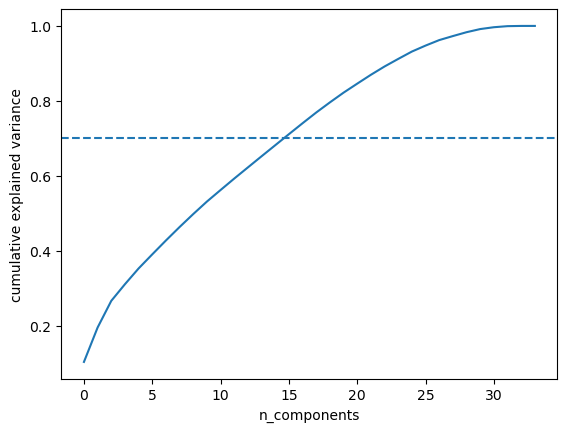

In [86]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca_full = PCA()
pca_full.fit(X_scaled)

cum_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components_70 = np.argmax(cum_var >= 0.70) + 1

print("70% 이상 설명하는 최소 주성분 개수:", n_components_70)

plt.plot(cum_var)
plt.axhline(0.70, linestyle="--")
plt.xlabel("n_components")
plt.ylabel("cumulative explained variance")
plt.show()


In [87]:
pca = PCA(n_components=n_components_70)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components_70)])
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,1.467075,0.263173,0.370161,-0.659347,-0.013964,-0.660275,-0.209382,-0.026393,0.028244,-0.165900,0.807642,-0.077376,0.054773,0.044086,0.044723,0.048643
1,-1.108342,1.984114,-0.552931,-0.280047,0.025435,1.778845,-0.600591,-0.779888,0.756713,0.599015,-0.707332,0.334037,0.376602,-0.178761,-0.107033,-0.177170
2,-0.276974,1.499953,0.843832,0.401992,0.173637,0.059200,-1.189772,1.655376,-1.051608,-1.711646,0.830069,0.358814,-0.910571,-0.734764,-0.582893,-0.016918
3,-1.353860,1.909350,-1.365677,-0.107310,0.271145,1.491988,-0.955117,-0.684715,0.816441,0.438864,-0.393682,0.092562,0.463218,-0.126749,-0.122882,-0.185904
4,0.222049,1.138287,0.648973,-0.905395,0.012433,0.507068,-1.202807,-1.221878,0.192392,0.215695,0.780318,-0.230124,0.126400,-0.145098,0.112118,0.030395


In [88]:
pc_summary = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(n_components_70)],
    "Explained_Var_Ratio": pca.explained_variance_ratio_,
    "Cumulative": np.cumsum(pca.explained_variance_ratio_)
})
pc_summary


,PC,Explained_Var_Ratio,Cumulative
0,PC1,0.103639,0.103639
1,PC2,0.091788,0.195428
2,PC3,0.071148,0.266575
3,PC4,0.044389,0.310964
4,PC5,0.042044,0.353008
5,PC6,0.037606,0.390614
6,PC7,0.037026,0.427641
7,PC8,0.035892,0.463532
8,PC9,0.034607,0.498139
9,PC10,0.033328,0.531467


In [90]:
brand_df.columns

Index(['title', 'country'], dtype='object')

In [92]:
country_brand = (
    df.groupby("country")["brand_name"]
    .nunique()
    .sort_values(ascending=False)
)

country_brand

country
Japan             10
United Kingdom     7
Germany            6
United States      5
France             4
Italy              4
South Korea        4
Sweden             2
Czech Republic     1
Malaysia           1
Romania            1
Spain              1
Name: brand_name, dtype: int64

In [94]:
num_df = df.select_dtypes(include="number")

num_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
0,6900,70189,2016,3.0,1.4,5.0,5.0,6.0
1,1495,88585,2008,4.0,1.2,3.0,5.0,4.0
2,949,137000,2011,NaN,1.4,5.0,5.0,5.0
3,2395,96731,2010,5.0,1.4,3.0,4.0,4.0
4,1000,85000,2013,NaN,1.3,5.0,5.0,5.0


In [95]:
corr = num_df.corr()
corr

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
Price,1.000000,-0.501826,0.754720,-0.481859,-0.024852,0.114416,-0.027228,0.697992
Mileage(miles),-0.501826,1.000000,-0.428500,0.318002,0.333456,-0.035498,0.096150,-0.378377
Registration_Year,0.754720,-0.428500,1.000000,-0.502282,-0.289660,0.222989,0.036651,0.920095
Previous Owners,-0.481859,0.318002,-0.502282,1.000000,0.195685,-0.153262,-0.029338,-0.476526
Engine,-0.024852,0.333456,-0.289660,0.195685,1.000000,-0.062116,0.073039,-0.264197
Doors,0.114416,-0.035498,0.222989,-0.153262,-0.062116,1.000000,0.496923,0.181788
Seats,-0.027228,0.096150,0.036651,-0.029338,0.073039,0.496923,1.000000,0.022541
Emission Class,0.697992,-0.378377,0.920095,-0.476526,-0.264197,0.181788,0.022541,1.000000
